In [13]:
import os
os.chdir(r'C:\Users\zkr24\Desktop\uchicago\Q2\health analytics\datasetPracticeFusionDiabetes')

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
df_trans = pd.read_csv("training_SyncTranscript.csv")
df_orig = pd.read_csv("training_SyncPatient_orig.csv")
df_smoke = pd.read_csv("training_SyncPatientSmokingStatus.csv")

In [16]:
df_test.head()

,PatientGuid,YearOfBirth,Height,Weight,BMI,DiastolicBP,SystolicBP,RespiratoryRate,Temperature,Gender_M
0,000B4862-7CE7-4EC5-8043-A97FCD74BD78,1925,65.0,100.0,16.639053,60.0,100.0,18.0,97.932,0
1,003CEE1F-5BF5-4171-9284-F5464EC12D41,1926,61.0,106.0,20.026337,82.0,130.0,12.0,96.308,0
2,004382BD-E31F-4091-8DE5-E86A59D70C2D,1961,63.0,234.0,41.446712,80.0,148.0,18.2,97.960,0
3,004EA6A7-6159-4D70-B06A-C0391D8623BD,1984,67.0,142.0,22.237915,72.0,108.0,14.6,98.300,0
4,0063B34F-C2C4-423A-A144-E51F7149253A,1968,68.0,240.0,36.487889,76.0,106.0,18.0,96.700,0


In [17]:
df_train.head()

,PatientGuid,DMIndicator,YearOfBirth,Height,Weight,BMI,DiastolicBP,SystolicBP,RespiratoryRate,Temperature,Gender_M
0,00023761-9D8D-445B-874C-2424CC7CF620,0,1956,68.0,182.00,27.669983,76.0,122.0,16.0,97.20,1
1,0005D9BD-0247-4F02-B7EE-7C1B44825FA1,0,1952,65.0,200.60,33.377941,75.0,135.0,15.0,98.30,0
2,00110ABC-DAB9-49E3-A1C8-88BBF8D58109,0,1970,71.0,228.72,31.896481,80.0,130.0,12.0,98.18,1
3,002667F4-B9A3-4DE2-875F-8034DD637865,0,1928,59.0,109.00,22.012927,90.0,160.0,20.0,97.36,0
4,0029BBC8-7C22-4444-9F44-87BEF05FE033,0,1953,68.0,208.00,31.622837,93.0,142.0,15.2,98.70,0


In [18]:
df_train.describe()

,DMIndicator,YearOfBirth,Height,Weight,BMI,DiastolicBP,SystolicBP,RespiratoryRate,Temperature,Gender_M
count,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6599.000000,6599.000000,6600.0000,6600.000000,6600.000000
mean,0.191818,1957.545909,65.872167,180.147606,36.971586,76.826337,126.368541,16.6570,97.770277,0.433788
std,0.393761,17.509446,5.161526,38.479717,178.842374,11.105265,17.568640,3.1564,1.703382,0.495634
min,0.000000,1922.000000,5.000000,2.000000,0.371736,1.000000,10.000000,1.0000,37.600000,0.000000
25%,0.000000,1944.000000,63.000000,154.000000,25.469686,70.000000,115.000000,15.6000,97.480000,0.000000
50%,0.000000,1957.000000,66.000000,177.280000,28.476724,78.000000,125.000000,16.0000,97.920000,0.000000
75%,0.000000,1971.000000,69.000000,203.000000,32.042211,83.000000,136.000000,18.0000,98.300000,1.000000
max,1.000000,1994.000000,112.000000,423.288000,5811.034218,142.000000,220.000000,80.0000,106.000000,1.000000


In [19]:
df_train.isnull().sum()

PatientGuid        0
DMIndicator        0
YearOfBirth        0
Height             0
Weight             0
BMI                0
DiastolicBP        1
SystolicBP         1
RespiratoryRate    0
Temperature        0
Gender_M           0
dtype: int64

### Drop NA

In [20]:
df_train.dropna(inplace=True)

In [21]:
df_train.shape

(6599, 11)

In [22]:
df=df_train
df.head()

,PatientGuid,DMIndicator,YearOfBirth,Height,Weight,BMI,DiastolicBP,SystolicBP,RespiratoryRate,Temperature,Gender_M
0,00023761-9D8D-445B-874C-2424CC7CF620,0,1956,68.0,182.00,27.669983,76.0,122.0,16.0,97.20,1
1,0005D9BD-0247-4F02-B7EE-7C1B44825FA1,0,1952,65.0,200.60,33.377941,75.0,135.0,15.0,98.30,0
2,00110ABC-DAB9-49E3-A1C8-88BBF8D58109,0,1970,71.0,228.72,31.896481,80.0,130.0,12.0,98.18,1
3,002667F4-B9A3-4DE2-875F-8034DD637865,0,1928,59.0,109.00,22.012927,90.0,160.0,20.0,97.36,0
4,0029BBC8-7C22-4444-9F44-87BEF05FE033,0,1953,68.0,208.00,31.622837,93.0,142.0,15.2,98.70,0


<ipython-input-23-a4808e887e7c>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_train.hist(ax=ax, color = 'maroon')


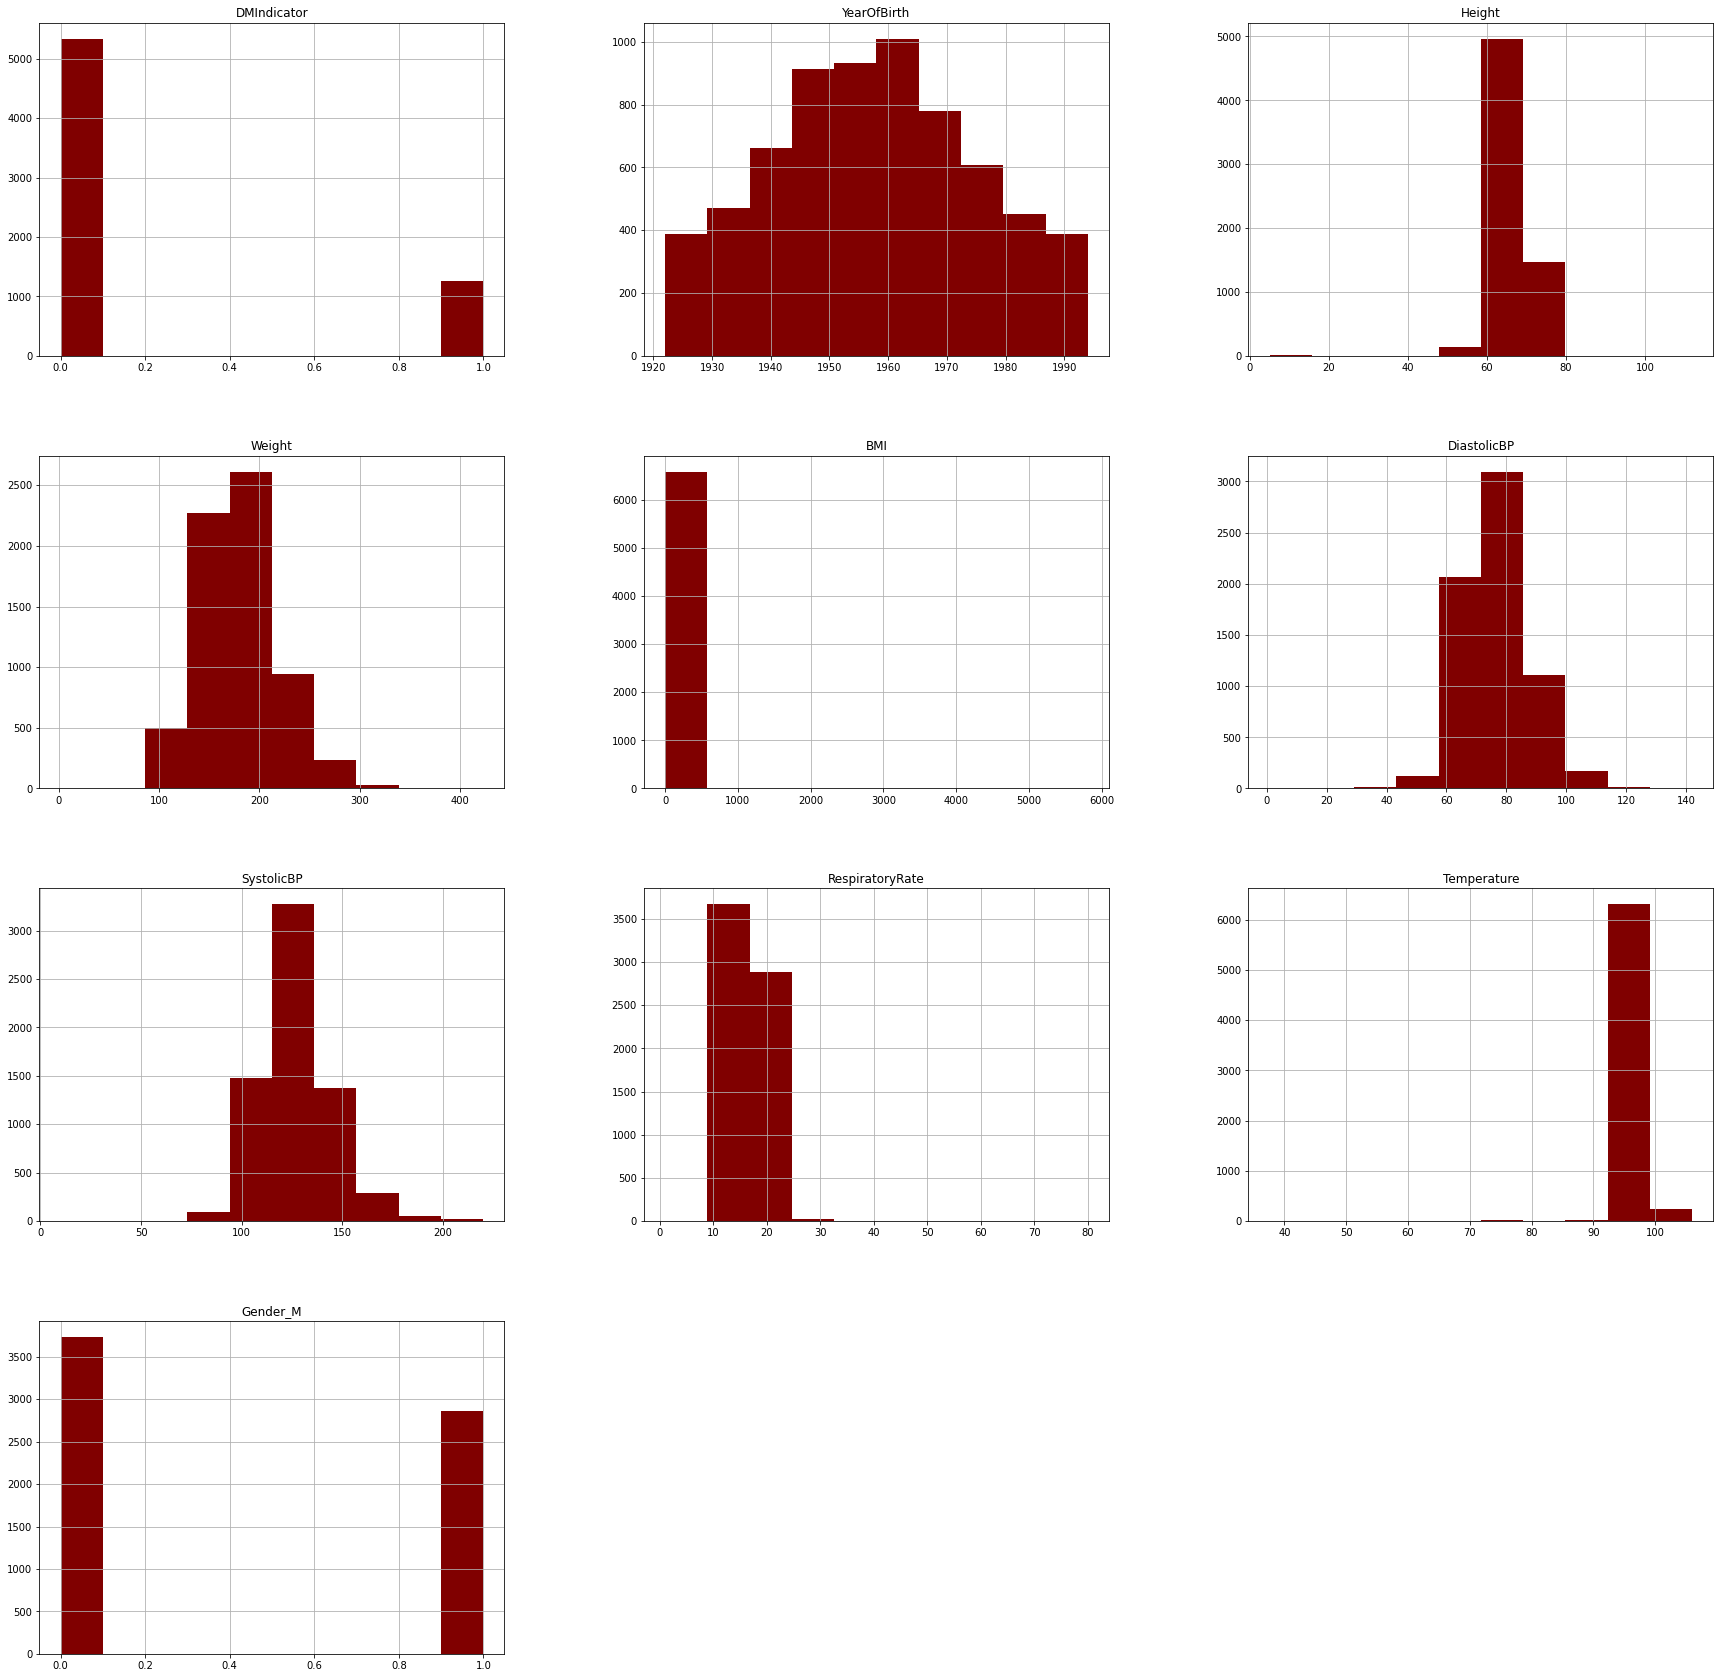

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (30,30))
ax = fig.gca()
df_train.hist(ax=ax, color = 'maroon')
pass

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

### Resample

In [165]:
df_oversample = df[df['DMIndicator'] == 1].sample(df[df['DMIndicator'] == 0]['BMI'].count(), replace=True)
df_oversampled = pd.concat([df[df['DMIndicator'] == 0], df_oversample], axis=0)

In [166]:
df_oversampled.describe()

,DMIndicator,YearOfBirth,Height,Weight,BMI,DiastolicBP,SystolicBP,RespiratoryRate,Temperature,Gender_M
count,10666.000000,10666.000000,10666.000000,10666.000000,10666.000000,10666.000000,10666.000000,10666.000000,10666.000000,10666.000000
mean,0.500000,1953.924527,65.850280,184.263349,38.128927,76.786612,128.275080,16.704763,97.704692,0.468498
std,0.500023,16.705329,5.276954,39.638170,183.259457,10.992186,17.772371,3.226749,1.929061,0.499030
min,0.000000,1922.000000,5.000000,2.000000,0.371736,1.000000,10.000000,1.000000,37.600000,0.000000
25%,0.000000,1942.000000,63.000000,157.767950,26.028035,70.000000,118.000000,16.000000,97.400000,0.000000
50%,0.500000,1953.000000,66.000000,180.000000,28.998750,78.000000,128.000000,16.000000,97.900000,0.000000
75%,1.000000,1965.000000,69.000000,207.200000,32.887057,83.000000,139.000000,18.000000,98.300000,1.000000
max,1.000000,1994.000000,112.000000,423.288000,5811.034218,142.000000,220.000000,80.000000,106.000000,1.000000


### Remove outliers

In [167]:
# Compute the quartiles
Q1 = df_oversampled.quantile(0.25)
Q3 = df_oversampled.quantile(0.75)
IQR = Q3 - Q1

# Identify the outlier
outlier = (df_oversampled < (Q1 - 1.5 * IQR)) | (df_oversampled > (Q3 + 1.5 * IQR))

# Remove the outlier
df_oversampled = df_oversampled[~outlier.any(axis=1)]

<ipython-input-167-e282b30bc6d1>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_oversampled.quantile(0.25)
<ipython-input-167-e282b30bc6d1>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_oversampled.quantile(0.75)
<ipython-input-167-e282b30bc6d1>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier = (df_oversampled < (Q1 - 1.5 * IQR)) | (df_oversampled > (Q3 + 1.5 * IQR))


In [168]:
IQR

DMIndicator         1.000000
YearOfBirth        23.000000
Height              6.000000
Weight             49.432050
BMI                 6.859022
DiastolicBP        13.000000
SystolicBP         21.000000
RespiratoryRate     2.000000
Temperature         0.900000
Gender_M            1.000000
dtype: float64

In [169]:
df_oversampled.shape

(8338, 11)

In [170]:
df_oversampled.describe()

,DMIndicator,YearOfBirth,Height,Weight,BMI,DiastolicBP,SystolicBP,RespiratoryRate,Temperature,Gender_M
count,8338.000000,8338.000000,8338.000000,8338.000000,8338.000000,8338.00000,8338.000000,8338.000000,8338.000000,8338.000000
mean,0.493883,1954.362317,65.963491,181.710712,29.295083,76.69681,127.368434,16.898105,97.876090,0.469537
std,0.499993,16.868088,4.012246,35.796870,4.886262,9.75199,15.455897,1.732423,0.628102,0.499101
min,0.000000,1922.000000,54.000000,87.000000,15.799412,51.00000,87.000000,13.000000,96.100000,0.000000
25%,0.000000,1942.000000,63.000000,157.000000,25.969781,70.00000,118.000000,16.000000,97.500000,0.000000
50%,0.000000,1953.000000,66.000000,179.530000,28.888200,78.00000,127.000000,16.400000,97.900000,0.000000
75%,1.000000,1966.000000,69.000000,205.000000,32.287010,82.00000,138.000000,18.000000,98.300000,1.000000
max,1.000000,1994.000000,78.000000,281.000000,42.794485,102.00000,170.000000,21.000000,99.600000,1.000000


### Correlation

<ipython-input-171-b31022b5c1c9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_oversampled.corr()


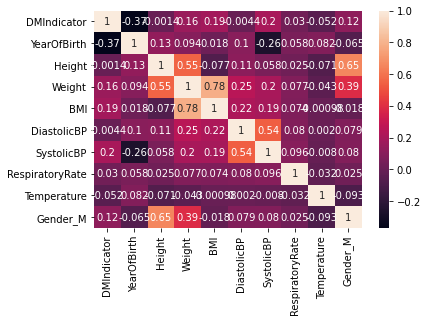

In [171]:
import matplotlib.pyplot as plt

corr = df_oversampled.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True)

# Show the plot
plt.show()

In [30]:
corr

,DMIndicator,YearOfBirth,Height,Weight,BMI,DiastolicBP,SystolicBP,RespiratoryRate,Temperature,Gender_M
DMIndicator,1.000000,-0.376779,-0.002383,0.166966,0.196281,-0.023545,0.187413,0.039173,-0.041064,0.129009
YearOfBirth,-0.376779,1.000000,0.126811,0.080490,0.003329,0.100536,-0.275732,0.049164,0.086623,-0.065103
Height,-0.002383,0.126811,1.000000,0.543917,-0.090013,0.111962,0.070714,0.013839,-0.078069,0.658671
Weight,0.166966,0.080490,0.543917,1.000000,0.781217,0.250386,0.215207,0.073218,-0.045013,0.391377
BMI,0.196281,0.003329,-0.090013,0.781217,1.000000,0.214900,0.200569,0.079630,0.001664,-0.020581
DiastolicBP,-0.023545,0.100536,0.111962,0.250386,0.214900,1.000000,0.515445,0.051673,-0.004876,0.089302
SystolicBP,0.187413,-0.275732,0.070714,0.215207,0.200569,0.515445,1.000000,0.076560,-0.019958,0.099688
RespiratoryRate,0.039173,0.049164,0.013839,0.073218,0.079630,0.051673,0.076560,1.000000,-0.026993,0.038421
Temperature,-0.041064,0.086623,-0.078069,-0.045013,0.001664,-0.004876,-0.019958,-0.026993,1.000000,-0.094192
Gender_M,0.129009,-0.065103,0.658671,0.391377,-0.020581,0.089302,0.099688,0.038421,-0.094192,1.000000


In [193]:
cols2 = ['YearOfBirth','BMI','DiastolicBP','SystolicBP','RespiratoryRate','Temperature','Gender_M']

In [194]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 
X_train, X_test, y_train, y_test = train_test_split(df_oversampled[cols2], df_oversampled['DMIndicator'], train_size=2/3)

In [195]:
X_train

,YearOfBirth,BMI,DiastolicBP,SystolicBP,RespiratoryRate,Temperature,Gender_M
3802,1957,32.854490,77.0,130.0,16.0,97.40,1
1176,1954,28.478009,83.0,131.0,16.0,97.80,1
6579,1950,37.704152,83.0,145.0,20.0,98.60,1
4560,1936,30.394255,80.0,120.0,16.0,98.80,1
6553,1937,28.315278,62.0,137.0,16.0,97.60,0
...,...,...,...,...,...,...,...
2436,1993,24.951258,80.0,104.0,14.0,97.30,1
4882,1959,35.666437,77.0,126.0,18.0,97.40,0
3524,1959,28.350347,62.0,118.0,16.0,98.10,1
6305,1956,27.419575,80.0,110.0,16.0,97.88,0


In [229]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def model_results(model):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print('train:')
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print('test:')
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    y_pred_prob = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_test_pred)
    auc = metrics.roc_auc_score(y_test, y_test_pred)
    plt.plot(fpr, tpr, label = "data 1, auc ="+str(auc), color = 'maroon')
    plt.legend(loc = 4)
    plt.title('ROC curve')
    plt.show()
    return model

### Logistic Regression

train:
[[1849  955]
 [ 867 1887]]
              precision    recall  f1-score   support

           0       0.68      0.66      0.67      2804
           1       0.66      0.69      0.67      2754

    accuracy                           0.67      5558
   macro avg       0.67      0.67      0.67      5558
weighted avg       0.67      0.67      0.67      5558

test:
[[920 496]
 [407 957]]
              precision    recall  f1-score   support

           0       0.69      0.65      0.67      1416
           1       0.66      0.70      0.68      1364

    accuracy                           0.68      2780
   macro avg       0.68      0.68      0.68      2780
weighted avg       0.68      0.68      0.68      2780



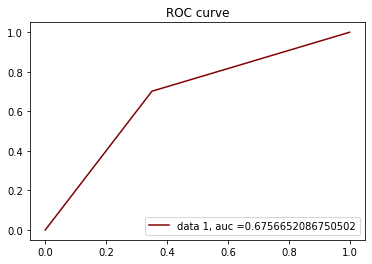

LogisticRegression(max_iter=500)

In [197]:
from sklearn.linear_model import LogisticRegression
model_results(LogisticRegression(max_iter=500))

In [198]:
#get the best coefficients
logreg = LogisticRegression(max_iter= 500)
lm = logreg.fit(X_train, y_train)
feature_imp = logreg.coef_
coef_table = pd.DataFrame({"feature_names":X_train.columns, "Beta":feature_imp[0],"AbsBeta":abs(feature_imp[0])})
#get the sorted value
coef_table = coef_table.sort_values(by='AbsBeta', ascending = False)
print("The most important features are: \n")
coef_table

The most important features are: 



,feature_names,Beta,AbsBeta
6,Gender_M,0.587373,0.587373
5,Temperature,0.518196,0.518196
1,BMI,0.084797,0.084797
4,RespiratoryRate,0.063353,0.063353
2,DiastolicBP,-0.030325,0.030325
0,YearOfBirth,-0.028497,0.028497
3,SystolicBP,0.026892,0.026892


### Decision Tree

In [199]:
class find_depth:
    
    def __init__(self,para):
        assert para in ("RandomForest","DecisionTree"), "please input a valid algorithm"
        self.para = para
        if self.para == "RandomForest":
            self.RandomForestClassifier()
        if self.para == "DecisionTree":
            self.DecisionTreeClassifier()
    
    def RandomForestClassifier(self):
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.model_selection import cross_val_score, GridSearchCV

        # define the range of max_depth values to test
        param_grid = {'max_depth': range(1, 20)}

        # initialize the random forest classifier
        clf = RandomForestClassifier()

        # use GridSearchCV to perform cross-validation and find the optimal max_depth
        grid_search = GridSearchCV(clf, param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        
        # extract the mean cross-validation scores for each max_depth value
        scores = grid_search.cv_results_['mean_test_score']

        # plot the scores against the max_depth values
        plt.plot(range(1, 20), scores)
        plt.xlabel('max_depth')
        plt.ylabel('Mean Cross-Validation Score')
        plt.show()
        
        # print the optimal max_depth
        print("Optimal max_depth:", grid_search.best_params_['max_depth'])
    
    def DecisionTreeClassifier(self):
        from sklearn.tree import DecisionTreeClassifier
        from sklearn.model_selection import cross_val_score, GridSearchCV

        # define the range of max_depth values to test
        param_grid = {'max_depth': range(1, 20)}

        # initialize the random forest classifier
        clf = DecisionTreeClassifier()

        # use GridSearchCV to perform cross-validation and find the optimal max_depth
        grid_search = GridSearchCV(clf, param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        
        # extract the mean cross-validation scores for each max_depth value
        scores = grid_search.cv_results_['mean_test_score']

        # plot the scores against the max_depth values
        plt.plot(range(1, 20), scores)
        plt.xlabel('max_depth')
        plt.ylabel('Mean Cross-Validation Score')
        plt.show()
        
        # print the optimal max_depth
        print("Optimal max_depth:", grid_search.best_params_['max_depth'])

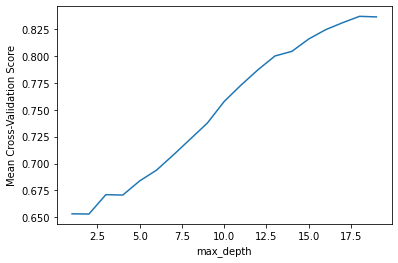

Optimal max_depth: 18


In [178]:
find_depth("DecisionTree")

train:
[[1616 1202]
 [ 570 2170]]
              precision    recall  f1-score   support

           0       0.74      0.57      0.65      2818
           1       0.64      0.79      0.71      2740

    accuracy                           0.68      5558
   macro avg       0.69      0.68      0.68      5558
weighted avg       0.69      0.68      0.68      5558

test:
[[ 808  594]
 [ 270 1108]]
              precision    recall  f1-score   support

           0       0.75      0.58      0.65      1402
           1       0.65      0.80      0.72      1378

    accuracy                           0.69      2780
   macro avg       0.70      0.69      0.69      2780
weighted avg       0.70      0.69      0.69      2780



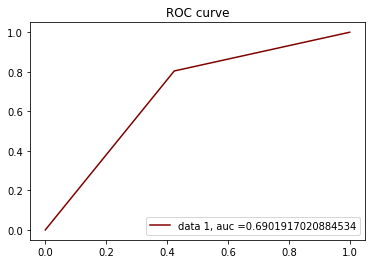

In [187]:
from sklearn.tree import DecisionTreeClassifier
dt = model_results(DecisionTreeClassifier(max_depth=3))

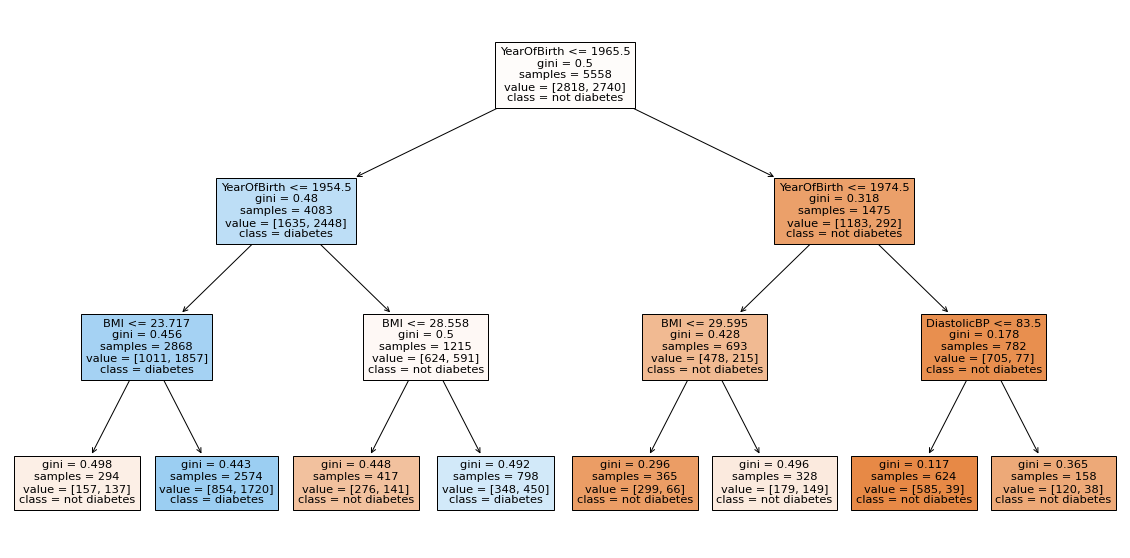

In [188]:
plt.figure(figsize=(20, 10))
from sklearn import tree
tree.plot_tree(dt, max_depth=3, feature_names=cols2, class_names=['not diabetes', 'diabetes'], filled=True);

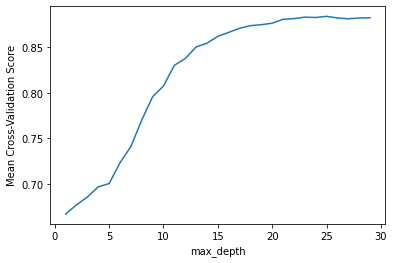

In [200]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

# define the range of max_depth values to test
param_grid = {'max_depth': range(1, 30)}

# initialize the random forest classifier
clf = RandomForestClassifier()

# use GridSearchCV to perform cross-validation and find the optimal max_depth
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# extract the mean cross-validation scores for each max_depth value
scores = grid_search.cv_results_['mean_test_score']

# plot the scores against the max_depth values
plt.plot(range(1, 30), scores)
plt.xlabel('max_depth')
plt.ylabel('Mean Cross-Validation Score')
plt.show()

### Random Forest

train:
[[2681  123]
 [  20 2734]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2804
           1       0.96      0.99      0.97      2754

    accuracy                           0.97      5558
   macro avg       0.97      0.97      0.97      5558
weighted avg       0.97      0.97      0.97      5558

test:
[[4685  648]
 [ 240 1026]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      5333
           1       0.61      0.81      0.70      1266

    accuracy                           0.87      6599
   macro avg       0.78      0.84      0.81      6599
weighted avg       0.89      0.87      0.87      6599



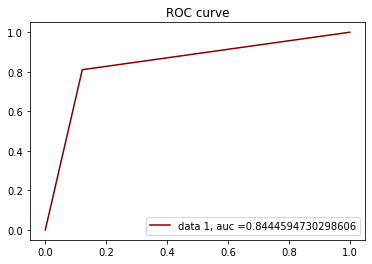

In [231]:
from sklearn.ensemble import RandomForestClassifier
dt2 = model_results(RandomForestClassifier(n_estimators=10, max_depth=15))

<AxesSubplot: title={'center': 'Feature Importance'}>

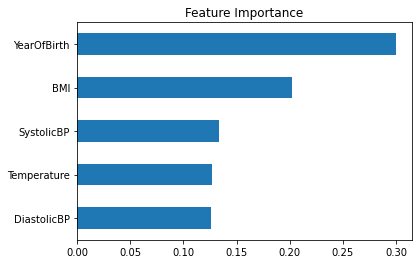

In [232]:
pd.Series(dt2.feature_importances_, index=X_train.columns).sort_values().tail().plot(kind='barh', title='Feature Importance')

### Calculate Probability for Test Dataset

In [207]:
df_test.head()

,PatientGuid,YearOfBirth,Height,Weight,BMI,DiastolicBP,SystolicBP,RespiratoryRate,Temperature,Gender_M
0,000B4862-7CE7-4EC5-8043-A97FCD74BD78,1925,65.0,100.0,16.639053,60.0,100.0,18.0,97.932,0
1,003CEE1F-5BF5-4171-9284-F5464EC12D41,1926,61.0,106.0,20.026337,82.0,130.0,12.0,96.308,0
2,004382BD-E31F-4091-8DE5-E86A59D70C2D,1961,63.0,234.0,41.446712,80.0,148.0,18.2,97.960,0
3,004EA6A7-6159-4D70-B06A-C0391D8623BD,1984,67.0,142.0,22.237915,72.0,108.0,14.6,98.300,0
4,0063B34F-C2C4-423A-A144-E51F7149253A,1968,68.0,240.0,36.487889,76.0,106.0,18.0,96.700,0


In [208]:
df_temp = df_test.drop(columns=['PatientGuid','Height','Weight'])
df_temp.head()

,YearOfBirth,BMI,DiastolicBP,SystolicBP,RespiratoryRate,Temperature,Gender_M
0,1925,16.639053,60.0,100.0,18.0,97.932,0
1,1926,20.026337,82.0,130.0,12.0,96.308,0
2,1961,41.446712,80.0,148.0,18.2,97.960,0
3,1984,22.237915,72.0,108.0,14.6,98.300,0
4,1968,36.487889,76.0,106.0,18.0,96.700,0


In [209]:
from sklearn.ensemble import RandomForestClassifier
# train a random forest model

clf = RandomForestClassifier(n_estimators=10, max_depth=15)
clf.fit(X_train, y_train)

# predict the probability of each class for the test dataframe
probs = clf.predict_proba(df_temp)
print(probs)

[[0.6        0.4       ]
 [0.8        0.2       ]
 [0.31421569 0.68578431]
 ...
 [0.45619771 0.54380229]
 [0.22655525 0.77344475]
 [1.         0.        ]]


In [210]:
prob = probs[:,1]
prob

array([0.4       , 0.2       , 0.68578431, ..., 0.54380229, 0.77344475,
       0.        ])

In [211]:
len(prob)

3348

In [219]:
df_test['DMIndicatorForecast'] = prob
df_test.head()

,PatientGuid,YearOfBirth,Height,Weight,BMI,DiastolicBP,SystolicBP,RespiratoryRate,Temperature,Gender_M,DMIndicatorForecast
0,000B4862-7CE7-4EC5-8043-A97FCD74BD78,1925,65.0,100.0,16.639053,60.0,100.0,18.0,97.932,0,0.400000
1,003CEE1F-5BF5-4171-9284-F5464EC12D41,1926,61.0,106.0,20.026337,82.0,130.0,12.0,96.308,0,0.200000
2,004382BD-E31F-4091-8DE5-E86A59D70C2D,1961,63.0,234.0,41.446712,80.0,148.0,18.2,97.960,0,0.685784
3,004EA6A7-6159-4D70-B06A-C0391D8623BD,1984,67.0,142.0,22.237915,72.0,108.0,14.6,98.300,0,0.000000
4,0063B34F-C2C4-423A-A144-E51F7149253A,1968,68.0,240.0,36.487889,76.0,106.0,18.0,96.700,0,0.000000


In [220]:
df_test2 = df_test[['PatientGuid','DMIndicatorForecast']]
df_test2.head()

,PatientGuid,DMIndicatorForecast
0,000B4862-7CE7-4EC5-8043-A97FCD74BD78,0.400000
1,003CEE1F-5BF5-4171-9284-F5464EC12D41,0.200000
2,004382BD-E31F-4091-8DE5-E86A59D70C2D,0.685784
3,004EA6A7-6159-4D70-B06A-C0391D8623BD,0.000000
4,0063B34F-C2C4-423A-A144-E51F7149253A,0.000000
...,...,...
3343,FF9BA1EB-03AB-47FE-B110-B559D8E0835B,0.500000
3344,FFA25126-98E0-46E2-9B80-FBEEEA1C7D71,0.487176
3345,FFB3BB66-F74A-462E-A9B8-F982857B4CB3,0.543802
3346,FFC8E19F-A199-46A3-895A-E3C07FBAC809,0.773445


In [224]:
test_orig = pd.read_csv("test_SyncPatient.csv")
test_orig.head()

,PatientGuid,Gender,YearOfBirth,State,PracticeGuid
0,027AC271-0852-4DDD-99C2-A74FE50066E0,F,1978,CA,4D27688B-C925-4513-9CF9-8D281ACC6712
1,C5D4C6FA-A2B3-4CCD-A8D5-A760127CE47D,F,1941,PA,44C560D5-82B4-436A-9C72-C090F5377FD0
2,1F4D1486-7632-4576-AC92-A760680D1DC9,M,1938,VA,9891CFAA-9B40-4120-AE20-3A1D86064898
3,0F6AD971-F133-4BD7-B508-A76788D9C46C,M,1952,OH,64F84808-F87B-41CF-8E4B-5E0F456359B4
4,1E23496C-7AAF-4A91-AAF4-A769BD439E67,F,1961,FL,BD209FBC-E92C-4392-A085-1DDA42AF37BA


In [225]:
merged_df = pd.merge(test_orig, df_test2, on='PatientGuid', how='left')

In [226]:
merged_df

,PatientGuid,Gender,YearOfBirth,State,PracticeGuid,DMIndicatorForecast
0,027AC271-0852-4DDD-99C2-A74FE50066E0,F,1978,CA,4D27688B-C925-4513-9CF9-8D281ACC6712,0.000000
1,C5D4C6FA-A2B3-4CCD-A8D5-A760127CE47D,F,1941,PA,44C560D5-82B4-436A-9C72-C090F5377FD0,0.431514
2,1F4D1486-7632-4576-AC92-A760680D1DC9,M,1938,VA,9891CFAA-9B40-4120-AE20-3A1D86064898,0.671978
3,0F6AD971-F133-4BD7-B508-A76788D9C46C,M,1952,OH,64F84808-F87B-41CF-8E4B-5E0F456359B4,0.709189
4,1E23496C-7AAF-4A91-AAF4-A769BD439E67,F,1961,FL,BD209FBC-E92C-4392-A085-1DDA42AF37BA,0.516753
...,...,...,...,...,...,...
3343,96C0A4E6-1E3E-497E-9C4E-FFEC0E25AD3A,F,1978,TX,E7101967-2FF1-4B0F-8129-B0B429D1D15C,0.000000
3344,5845977A-3014-4301-92B3-FFF0A2EBBAD2,F,1986,WA,EADEC07A-9901-411F-BBE3-04376029E1E8,0.100000
3345,F948403A-ABE6-496D-B37D-FFF9A9D79767,F,1955,CA,57B6F75F-CF0A-4225-BAD0-8222A7D4B489,0.410598
3346,F764BC86-0CFA-4661-8D84-FFFA8E2B6080,F,1960,CA,1A69F223-8409-4FDC-A26C-114677D2D4C3,0.300000


In [228]:
merged_df.to_csv('test_SyncPatientForecast.csv',index=False)